In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

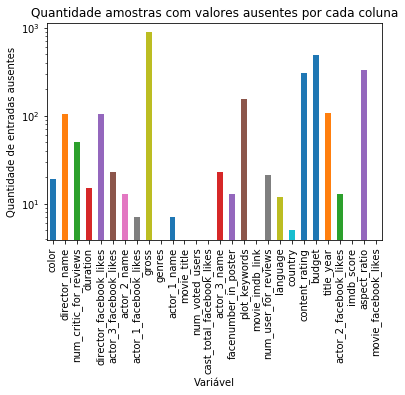

In [102]:
# Importando dados
movies_df = pd.read_csv('../filmes.csv')
# Visão geral das colunas e dados ausentes
missing = movies_df.isnull().sum()
plot = missing.plot(kind='bar')
plot.set_yscale('log')
plot.set_ylabel('Quantidade de entradas ausentes')
plot.set_xlabel('Variável')
plot.set_title('Quantidade amostras com valores ausentes por cada coluna')
plt.savefig('../plots/missing-values.eps', format='eps', transparent=True, bbox_inches = 'tight')
missing

## 1. Deletando entradas com 25% dos valores ausentes

In [3]:
num_variables = len(movies_df.columns)
threshold = 0.25*num_variables
print("Número de variáveis: {}. Limite de {} valores ausentes".format(num_variables, threshold))

# 1. Substituir 0's por NaN's
movies_df = movies_df.applymap(lambda x: np.nan if x == 0.0 else x)
size = len(movies_df)
# 2. Contabilizar valores ausentes por linha
count_missing = movies_df.isnull().sum(axis='columns')
# 3. Remover
movies_df = movies_df[count_missing < threshold]
print("{} de {} entradas removidas".format(size-len(movies_df), size))

Número de variáveis: 28. Limite de 7.0 valores ausentes
92 de 5043 entradas removidas


In [4]:
# Tirando todos os espaços em branco antes e depois das palavras
movies_df = movies_df.applymap(lambda x: x.strip() if type(x) is str else x)

## 2.0 Separando variáveis categóricas das variáveis numéricas

In [5]:
categorical_variables = ['actor_1_name', 'actor_2_name', 'actor_3_name', 'country', 'director_name', 'genres', 'language', 'movie_title', 'movie_imdb_link', 'plot_keywords', 'color', 'content_rating', 'title_year', 'aspect_ratio']
numerical_variables = [v for v in movies_df.columns if v not in categorical_variables]

## 3. Processando variáveis categóricas

In [6]:
# Descrição do dataset categórico puro
movies_df[categorical_variables].astype(str).describe()

,actor_1_name,actor_2_name,actor_3_name,country,director_name,genres,language,movie_title,movie_imdb_link,plot_keywords,color,content_rating,title_year,aspect_ratio
count,4951,4951,4951,4951,4951,4951,4951,4951,4951,4951,4951,4951,4951,4951
unique,2039,2969,3466,62,2358,902,46,4824,4827,4710,3,19,92,23
top,Robert De Niro,Morgan Freeman,Ben Mendelsohn,USA,nan,Drama,English,Home,http://www.imdb.com/title/tt3332064/?ref_=fn_t...,nan,Color,R,2009.0,2.35
freq,49,20,8,3757,62,231,4630,3,3,113,4731,2117,259,2358


In [7]:
# Amostra do dataset
movies_df[categorical_variables].head()

,actor_1_name,actor_2_name,actor_3_name,country,director_name,genres,language,movie_title,movie_imdb_link,plot_keywords,color,content_rating,title_year,aspect_ratio
0,CCH Pounder,Joel David Moore,Wes Studi,USA,James Cameron,Action|Adventure|Fantasy|Sci-Fi,English,Avatar,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,avatar|future|marine|native|paraplegic,Color,PG-13,2009.0,1.78
1,Johnny Depp,Orlando Bloom,Jack Davenport,USA,Gore Verbinski,Action|Adventure|Fantasy,English,Pirates of the Caribbean: At World's End,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,goddess|marriage ceremony|marriage proposal|pi...,Color,PG-13,2007.0,2.35
2,Christoph Waltz,Rory Kinnear,Stephanie Sigman,UK,Sam Mendes,Action|Adventure|Thriller,English,Spectre,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,bomb|espionage|sequel|spy|terrorist,Color,PG-13,2015.0,2.35
3,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,USA,Christopher Nolan,Action|Thriller,English,The Dark Knight Rises,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,deception|imprisonment|lawlessness|police offi...,Color,PG-13,2012.0,2.35
5,Daryl Sabara,Samantha Morton,Polly Walker,USA,Andrew Stanton,Action|Adventure|Sci-Fi,English,John Carter,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,alien|american civil war|male nipple|mars|prin...,Color,PG-13,2012.0,2.35


In [8]:
movies_df[categorical_variables].isnull().sum()

actor_1_name         0
actor_2_name         0
actor_3_name         6
country              1
director_name       62
genres               0
language             7
movie_title          0
movie_imdb_link      0
plot_keywords      113
color               12
content_rating     236
title_year          62
aspect_ratio       275
dtype: int64

### 3.1 Tratando valores ausentes

#### Atores

In [9]:
missing = movies_df[movies_df['actor_1_name'].isna() & movies_df['actor_2_name'].isna() | movies_df['actor_3_name'].isna()]
missing

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1782,Color,Jacques Perrin,100.0,81.0,63.0,NaN,Philippe Labro,63.0,10762178.0,Documentary,...,153.0,English,France,G,160000000.0,2001.0,3.0,8.0,1.85,1000.0
3528,Color,Gus Van Sant,103.0,103.0,835.0,NaN,Casey Affleck,13000.0,236266.0,Adventure|Drama|Mystery,...,290.0,English,USA,R,3500000.0,2002.0,NaN,6.2,2.35,NaN
3610,Color,Jean-Jacques Mantello,9.0,42.0,NaN,NaN,Daryl Hannah,844.0,7518876.0,Adventure|Documentary|Short,...,5.0,English,UK,NaN,6000000.0,2008.0,NaN,6.5,1.78,28.0
4225,Color,James Algar,99.0,120.0,11.0,NaN,Deems Taylor,16.0,76400000.0,Animation|Family|Fantasy|Music,...,230.0,English,USA,G,2280000.0,1940.0,NaN,7.8,1.37,3000.0
4548,Color,Davis Guggenheim,372.0,96.0,49.0,NaN,Al Gore,861.0,23808111.0,Documentary,...,504.0,English,USA,PG,NaN,2006.0,68.0,7.5,1.85,NaN
5009,Color,James Bidgood,8.0,65.0,NaN,NaN,Bobby Kendall,NaN,8231.0,Drama|Fantasy,...,16.0,English,USA,Not Rated,27000.0,1971.0,NaN,6.7,1.37,85.0


In [10]:
## Os filmes que faltam o 3o autor são antigos e em pouca quantidade. Deletar.
movies_df = movies_df[~movies_df['actor_3_name'].isna()]
movies_df[categorical_variables].isnull().sum()

actor_1_name         0
actor_2_name         0
actor_3_name         0
country              1
director_name       62
genres               0
language             7
movie_title          0
movie_imdb_link      0
plot_keywords      113
color               12
content_rating     235
title_year          62
aspect_ratio       275
dtype: int64

#### Title year and aspect ratio

In [11]:
movies_df.title_year.value_counts().head()

2009.0    259
2014.0    244
2006.0    237
2013.0    231
2010.0    229
Name: title_year, dtype: int64

In [12]:
movies_df[movies_df['title_year'].isna()][categorical_variables].isnull().sum()
# Todos os que faltam ano faltam nome do diretor, duas coisas importantes, eliminando entradas

actor_1_name        0
actor_2_name        0
actor_3_name        0
country             0
director_name      62
genres              0
language            0
movie_title         0
movie_imdb_link     0
plot_keywords       0
color               0
content_rating      9
title_year         62
aspect_ratio        1
dtype: int64

In [13]:
movies_df = movies_df[~movies_df['title_year'].isna()]

In [14]:
movies_df.aspect_ratio.value_counts().head()
# tem 275 entradas com um aspect ration faltando, se atribuir um valor padrão vai se tornar uma das categorias mais
#frequentes

2.35    2355
1.85    1900
1.37      97
1.78      90
1.66      63
Name: aspect_ratio, dtype: int64

In [15]:
movies_df[movies_df['aspect_ratio'].isna()][categorical_variables].isnull().sum()
# pela tabela abaixo eliminando todos os q faltam aspect ratio, elimina boa parte dos que faltam keywords e rating

actor_1_name         0
actor_2_name         0
actor_3_name         0
country              0
director_name        0
genres               0
language             2
movie_title          0
movie_imdb_link      0
plot_keywords       53
color                6
content_rating      90
title_year           0
aspect_ratio       274
dtype: int64

In [16]:
movies_df = movies_df[~movies_df['aspect_ratio'].isna()]

In [17]:
movies_df[categorical_variables].isnull().sum() 
# Ao eliminar as entradas com aspect ratio e title year ausentes, eliminaos as entradas com diretor ausente

actor_1_name         0
actor_2_name         0
actor_3_name         0
country              1
director_name        0
genres               0
language             5
movie_title          0
movie_imdb_link      0
plot_keywords       60
color                6
content_rating     136
title_year           0
aspect_ratio         0
dtype: int64

#### País

In [18]:
country_df = movies_df.country
country_df.describe()

count     4608
unique      57
top        USA
freq      3508
Name: country, dtype: object

In [19]:
print("Tabela de Frequências")
country_df.value_counts().head()

Tabela de Frequências


USA        3508
UK          416
France      143
Canada      106
Germany      95
Name: country, dtype: int64

In [20]:
## Valores Ausentes
movies_df[movies_df['country'].isna()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4021,Color,Daniel Petrie Jr.,9.0,88.0,19.0,322.0,Jeff Fahey,795.0,NaN,Drama|Thriller,...,13.0,English,NaN,NaN,3500000.0,2014.0,535.0,4.8,2.35,570.0


In [21]:
# Ajustando todos valores ausentes manualmente, baseando-se no país
#categorical_df.loc[2370, 'country'] = "USA"
#categorical_df.loc[2370, 'director_name'] = "Ben Affleck"

#categorical_df.loc[3397, 'country'] = "USA"
#categorical_df.loc[3397, 'director_name'] = "Sam Catlin"

movies_df.loc[4021, 'country'] = "USA"

#### Diretor - sem valores ausentes

#### Gêneros - sem valores ausentes

#### Keywords

In [22]:
movies_df['plot_keywords'].astype(str).describe()

count     4609
unique    4429
top        nan
freq        60
Name: plot_keywords, dtype: object

In [23]:
movies_df[movies_df['plot_keywords'].isna()].describe() #Estratégia: categoria padrao

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,58.000000,60.000000,46.000000,56.000000,60.000000,2.200000e+01,60.000000,60.000000,37.000000,60.000000,5.200000e+01,60.000000,57.000000,60.000000,60.000000,46.000000
mean,21.086207,97.433333,92.108696,217.285714,1332.983333,1.189567e+06,1389.466667,2231.150000,2.027027,13.366667,5.858885e+06,2012.300000,312.543860,5.910000,2.578833,1580.152174
std,25.144693,14.340138,203.624298,230.003535,4654.548872,3.394531e+06,2438.509947,5135.931635,1.536346,19.243283,1.080833e+07,3.455774,298.168461,1.294408,2.531770,5232.791687
min,1.000000,59.000000,3.000000,2.000000,10.000000,3.330000e+03,6.000000,12.000000,1.000000,1.000000,1.000000e+04,2002.000000,5.000000,2.600000,1.330000,4.000000
25%,5.250000,89.750000,8.000000,33.750000,160.500000,2.419150e+04,127.500000,250.750000,1.000000,4.000000,3.750000e+05,2011.000000,63.000000,5.200000,1.850000,66.500000
50%,12.500000,97.000000,24.000000,132.000000,432.000000,8.519600e+04,395.500000,1049.500000,2.000000,7.500000,1.750000e+06,2013.000000,213.000000,6.150000,2.350000,193.500000
75%,22.750000,103.250000,61.000000,319.250000,898.750000,2.180728e+05,1649.750000,2429.000000,2.000000,13.500000,8.000000e+06,2015.000000,445.000000,6.950000,2.350000,396.500000
max,131.000000,141.000000,1000.000000,975.000000,35000.000000,1.494623e+07,15978.000000,38121.000000,7.000000,122.000000,6.500000e+07,2016.000000,1000.000000,8.100000,16.000000,26000.000000


In [24]:
#remover
movies_df = movies_df[~movies_df['plot_keywords'].isna()]

#### Idioma

In [25]:
movies_df['language'].value_counts().head()

English     4277
French        63
Spanish       33
Mandarin      25
German        18
Name: language, dtype: int64

In [26]:
movies_df.loc[movies_df['language'].isna()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3086,Color,Christopher Cain,43.0,111.0,58.0,258.0,Taylor Handley,482.0,1066555.0,Drama|History|Romance|Western,...,111.0,NaN,USA,R,11000000.0,2007.0,362.0,5.8,1.85,411.0
3869,Color,Mel Brooks,39.0,87.0,NaN,753.0,Dom DeLuise,898.0,NaN,Comedy|Romance,...,61.0,NaN,USA,PG,4400000.0,1976.0,842.0,6.7,1.85,629.0
4810,Black and White,D.W. Griffith,69.0,123.0,204.0,9.0,Mae Marsh,436.0,NaN,Drama|History|War,...,88.0,NaN,USA,Not Rated,385907.0,1916.0,22.0,8.0,1.33,691.0
4885,Black and White,King Vidor,48.0,151.0,54.0,6.0,Renée Adorée,81.0,NaN,Drama|Romance|War,...,45.0,NaN,USA,Not Rated,245000.0,1925.0,12.0,8.3,1.33,226.0
4958,Black and White,Harry F. Millarde,1.0,110.0,NaN,NaN,Johnnie Walker,2.0,3000000.0,Crime|Drama,...,1.0,NaN,USA,NaN,100000.0,1920.0,2.0,4.8,1.33,NaN


In [27]:
#Todos os que faltam são americanos, logo são em inglês
movies_df.loc[movies_df['language'].isna(), 'language'] = 'English'

#### Classificação Indicativa

In [28]:
movies_df.content_rating.value_counts()

R            2013
PG-13        1411
PG            665
G             105
Not Rated      83
Approved       55
Unrated        53
X              13
Passed          9
NC-17           7
GP              5
M               5
TV-14           3
TV-G            3
TV-PG           1
Name: content_rating, dtype: int64

In [29]:
movies_df[movies_df['content_rating'].isna()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
98,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,NaN
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,NaN
242,Color,Frédéric Forestier,33.0,116.0,NaN,141.0,Santiago Segura,936.0,NaN,Adventure|Comedy|Family|Fantasy,...,36.0,French,France,NaN,78000000.0,2008.0,276.0,5.1,2.35,291.0
489,Color,Lucile Hadzihalilovic,63.0,81.0,92.0,8.0,Roxane Duran,23.0,NaN,Drama|Horror|Mystery|Sci-Fi,...,3.0,French,France,NaN,NaN,2015.0,21.0,6.4,2.35,257.0
810,Color,Pou-Soi Cheang,14.0,119.0,3.0,22.0,Aaron Kwok,879.0,NaN,Action|Adventure|Fantasy,...,9.0,English,China,NaN,68005000.0,2016.0,107.0,6.0,2.35,426.0
1044,Color,Chuck Bowman,32.0,89.0,42.0,235.0,Lochlyn Munro,598.0,NaN,Horror|Thriller,...,32.0,English,USA,NaN,1500000.0,2006.0,555.0,4.6,1.78,352.0
1329,Color,S.S. Rajamouli,44.0,159.0,50.0,72.0,Anushka Shetty,218.0,6498000.0,Action|Adventure|Drama|Fantasy|War,...,410.0,Telugu,India,NaN,18026148.0,2015.0,133.0,8.4,1.85,21000.0
1724,Color,Laurent Tirard,56.0,91.0,2.0,55.0,Sandrine Kiberlain,295.0,NaN,Comedy|Family,...,17.0,French,France,NaN,NaN,2009.0,71.0,7.2,1.85,NaN
1730,Color,Olivier Dahan,132.0,103.0,61.0,520.0,Frank Langella,963.0,NaN,Biography|Drama|Romance,...,62.0,English,Switzerland,NaN,30000000.0,2014.0,903.0,5.7,2.35,6000.0
1793,Color,Agustín Díaz Yanes,31.0,145.0,13.0,278.0,Elena Anaya,10000.0,NaN,Adventure|Drama|History|Romance|Thriller|War,...,84.0,Spanish,Spain,NaN,24000000.0,2006.0,1000.0,6.1,1.85,NaN


In [30]:
# substituir pela moda
movies_df.content_rating.fillna(movies_df.content_rating.mode()[0], inplace=True)

In [31]:
# Tabela de frequência acumulada
movies_df.content_rating.value_counts().cumsum() / len(movies_df.content_rating) * 100

R             46.845461
PG-13         77.863267
PG            92.481864
G             94.790064
Not Rated     96.614641
Approved      97.823698
Unrated       98.988789
X             99.274566
Passed        99.472412
NC-17         99.626291
GP            99.736206
M             99.846120
TV-14         99.912069
TV-G          99.978017
TV-PG        100.000000
Name: content_rating, dtype: float64

#### Cor

In [32]:
# Visualização dos dados antes de tratar dados ausentes
movies_df['color'].astype(str).value_counts()

Color              4346
Black and White     198
nan                   5
Name: color, dtype: int64

In [33]:
#Estratégia: remover as que faltam, dado que são poucas
movies_df = movies_df[~movies_df['color'].isna()]

In [34]:
movies_df[categorical_variables].isnull().sum()

actor_1_name       0
actor_2_name       0
actor_3_name       0
country            0
director_name      0
genres             0
language           0
movie_title        0
movie_imdb_link    0
plot_keywords      0
color              0
content_rating     0
title_year         0
aspect_ratio       0
dtype: int64

## 4. Processando variáveis numéricas

In [35]:
movies_df[numerical_variables].head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,178.0,NaN,855.0,1000.0,760505847.0,886204,4834.0,NaN,3054.0,237000000.0,936.0,7.9,33000.0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350.0,NaN,1238.0,300000000.0,5000.0,7.1,NaN
2,602.0,148.0,NaN,161.0,11000.0,200074175.0,275868,11700.0,1.0,994.0,245000000.0,393.0,6.8,85000.0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759.0,NaN,2701.0,250000000.0,23000.0,8.5,164000.0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873.0,1.0,738.0,263700000.0,632.0,6.6,24000.0


### 4.1 Valores Ausentes

In [36]:
#### Visão geral
#pd.options.mode.chained_assignment = None ## remover dps

In [37]:
movies_df[numerical_variables].isnull().sum()

num_critic_for_reviews          9
duration                        1
director_facebook_likes       777
actor_3_facebook_likes         50
actor_1_facebook_likes          6
gross                         527
num_voted_users                 0
cast_total_facebook_likes       6
facenumber_in_poster         1950
num_user_for_reviews            2
budget                        303
actor_2_facebook_likes         22
imdb_score                      0
movie_facebook_likes         2056
dtype: int64

#### Tratando os valores ausentes para cada coluna individualmente

#### Facenumber in poster

In [38]:
# Quase 50% das amostras não tem esses dados, deletar a coluna
movies_df.drop('facenumber_in_poster', axis='columns', inplace=True)
numerical_variables.remove('facenumber_in_poster')

#### Num critic reviews

In [39]:
movies_df.num_critic_for_reviews.describe()

count    4535.000000
mean      151.967806
std       121.048672
min         1.000000
25%        63.000000
50%       122.000000
75%       208.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

In [40]:
#Substituindo pela média
movies_df.num_critic_for_reviews.fillna(movies_df.num_critic_for_reviews.mean(), inplace=True)

#### Duração

In [41]:
# Subs. pela media, pois poucos valores
movies_df.duration.fillna(movies_df.duration.mean(), inplace=True)

In [42]:
movies_df[numerical_variables].isnull().sum()

num_critic_for_reviews          0
duration                        0
director_facebook_likes       777
actor_3_facebook_likes         50
actor_1_facebook_likes          6
gross                         527
num_voted_users                 0
cast_total_facebook_likes       6
num_user_for_reviews            2
budget                        303
actor_2_facebook_likes         22
imdb_score                      0
movie_facebook_likes         2056
dtype: int64

#### Director facebook likes

In [43]:
#nome dos diretores sem likes
movies_df.director_facebook_likes.describe()

count     3767.000000
mean       889.014866
std       3177.578572
min          2.000000
25%         26.000000
50%         88.000000
75%        285.000000
max      23000.000000
Name: director_facebook_likes, dtype: float64

In [44]:
# Opção - Modelo preditivo simples com regressão usando decision tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler


In [45]:
regressor = KNeighborsRegressor() # default k = 5
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()
#data = pd.concat([categorical_df.dropna(), numerical_df])
data = movies_df[~movies_df['director_facebook_likes'].isna()][numerical_variables]
data.fillna(data.mean(), inplace=True)
data_x = data.drop('director_facebook_likes', axis='columns')
data_x = scalerX.fit_transform(data_x)
data_y = data.director_facebook_likes
data_y = scalerY.fit_transform(data_y.reshape(-1, 1))
results = cross_val_score(regressor, data_x, data_y, cv=10, scoring="neg_mean_absolute_error")
np.mean(results)

/home/dcandrade/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


-0.05322119498403297

In [46]:
regressor.fit(data_x, data_y)
x = movies_df[numerical_variables].drop('director_facebook_likes', axis='columns').fillna(movies_df.mean())
predicted_likes = regressor.predict(x)
predicted_likes = scalerY.inverse_transform(predicted_likes).flatten()
movies_df.director_facebook_likes.fillna(pd.Series(predicted_likes), inplace=True)

In [47]:
movies_df[numerical_variables].isnull().sum()

num_critic_for_reviews          0
duration                        0
director_facebook_likes        60
actor_3_facebook_likes         50
actor_1_facebook_likes          6
gross                         527
num_voted_users                 0
cast_total_facebook_likes       6
num_user_for_reviews            2
budget                        303
actor_2_facebook_likes         22
imdb_score                      0
movie_facebook_likes         2056
dtype: int64

In [48]:
movies_df.director_facebook_likes.fillna(movies_df.director_facebook_likes.mean(), inplace=True)
movies_df[numerical_variables].isnull().sum()

num_critic_for_reviews          0
duration                        0
director_facebook_likes         0
actor_3_facebook_likes         50
actor_1_facebook_likes          6
gross                         527
num_voted_users                 0
cast_total_facebook_likes       6
num_user_for_reviews            2
budget                        303
actor_2_facebook_likes         22
imdb_score                      0
movie_facebook_likes         2056
dtype: int64

#### Movie facebook likes

In [49]:
movies_df.movie_facebook_likes.describe()

count      2488.00000
mean      14958.42283
std       25302.24951
min          10.00000
25%         530.75000
50%        3000.00000
75%       19000.00000
max      349000.00000
Name: movie_facebook_likes, dtype: float64

In [50]:
regressor = KNeighborsRegressor() # default k = 5
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()
#data = pd.concat([categorical_df.dropna(), numerical_df])
data = movies_df[~movies_df['movie_facebook_likes'].isna()][numerical_variables]
data.fillna(data.mean(), inplace=True)
data_x = data.drop('movie_facebook_likes', axis='columns')
data_x = scalerX.fit_transform(data_x)
data_y = data.movie_facebook_likes
data_y = scalerY.fit_transform(data_y.reshape(-1, 1))
results = cross_val_score(regressor, data_x, data_y, cv=10, scoring="neg_mean_absolute_error")
np.mean(results)

/home/dcandrade/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


-0.02104677836433893

In [51]:
regressor.fit(data_x, data_y)
x = movies_df[numerical_variables].drop('movie_facebook_likes', axis='columns').fillna(movies_df.mean())
predicted_likes = regressor.predict(x)
predicted_likes = scalerY.inverse_transform(predicted_likes).flatten()

movies_df.movie_facebook_likes.fillna(pd.Series(predicted_likes), inplace=True)
movies_df.movie_facebook_likes.fillna(movies_df.movie_facebook_likes.mean(), inplace=True)

#### Actor Facebook Likes

In [52]:
#substituir pela média
columns = ['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']
for c in columns:
    movies_df[c].fillna(movies_df[c].mean(), inplace=True)
movies_df[numerical_variables].isnull().sum()

num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_1_facebook_likes         0
gross                        527
num_voted_users                0
cast_total_facebook_likes      6
num_user_for_reviews           2
budget                       303
actor_2_facebook_likes         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

#### Gross

In [53]:
movies_df.gross.describe()

count    4.017000e+03
mean     5.005147e+07
std      6.908852e+07
min      1.620000e+02
25%      6.482195e+06
50%      2.700000e+07
75%      6.426790e+07
max      7.605058e+08
Name: gross, dtype: float64

In [54]:
regressor = KNeighborsRegressor() # default k = 5
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()
#data = pd.concat([categorical_df.dropna(), numerical_df])
data = movies_df[~movies_df['gross'].isna()][numerical_variables]
data.fillna(data.mean(), inplace=True)
data_x = data.drop('gross', axis='columns')
data_x = scalerX.fit_transform(data_x)
data_y = data.gross
data_y = scalerY.fit_transform(data_y.reshape(-1, 1))
results = cross_val_score(regressor, data_x, data_y, cv=10, scoring="neg_mean_absolute_error")
np.mean(results)

/home/dcandrade/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


-0.045280434295531864

In [55]:
regressor.fit(data_x, data_y)
x = movies_df[numerical_variables].drop('gross', axis='columns').fillna(movies_df.mean())
predicted_gross = regressor.predict(x)
predicted_gross = scalerY.inverse_transform(predicted_gross).flatten()

movies_df.gross.fillna(pd.Series(predicted_gross), inplace=True)
movies_df[numerical_variables].isnull().sum()

num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_1_facebook_likes         0
gross                        107
num_voted_users                0
cast_total_facebook_likes      6
num_user_for_reviews           2
budget                       303
actor_2_facebook_likes         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [56]:
movies_df.gross.fillna(movies_df.gross.mean(), inplace=True)
movies_df[numerical_variables].isnull().sum()

num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_1_facebook_likes         0
gross                          0
num_voted_users                0
cast_total_facebook_likes      6
num_user_for_reviews           2
budget                       303
actor_2_facebook_likes         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

#### num_user_for_reviews

In [57]:
#média
movies_df.num_user_for_reviews.fillna(movies_df.num_user_for_reviews.mean(), inplace=True)
movies_df[numerical_variables].isnull().sum()

num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_1_facebook_likes         0
gross                          0
num_voted_users                0
cast_total_facebook_likes      6
num_user_for_reviews           0
budget                       303
actor_2_facebook_likes         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

#### budget

In [58]:
movies_df.budget.describe()

count    4.241000e+03
mean     4.204246e+07
std      2.131000e+08
min      2.180000e+02
25%      8.000000e+06
50%      2.000000e+07
75%      4.700000e+07
max      1.221550e+10
Name: budget, dtype: float64

In [59]:
regressor = KNeighborsRegressor() # default k = 5
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()
#data = pd.concat([categorical_df.dropna(), numerical_df])
data = movies_df[~movies_df['budget'].isna()][numerical_variables]
data.fillna(data.mean(), inplace=True)
data_x = data.drop('budget', axis='columns')
data_x = scalerX.fit_transform(data_x)
data_y = data.budget
data_y = scalerY.fit_transform(data_y.reshape(-1, 1))
results = cross_val_score(regressor, data_x, data_y, cv=10, scoring="neg_mean_absolute_error")
np.mean(results)

/home/dcandrade/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


-0.0029046120397179286

In [60]:
regressor.fit(data_x, data_y)
x = movies_df[numerical_variables].drop('budget', axis='columns').fillna(movies_df.mean())
predicted_budget = regressor.predict(x)
predicted_budget = scalerY.inverse_transform(predicted_budget).flatten()

movies_df.budget.fillna(pd.Series(predicted_budget), inplace=True)
movies_df[numerical_variables].isnull().sum()

num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        0
actor_1_facebook_likes        0
gross                         0
num_voted_users               0
cast_total_facebook_likes     6
num_user_for_reviews          0
budget                       54
actor_2_facebook_likes        0
imdb_score                    0
movie_facebook_likes          0
dtype: int64

In [61]:
movies_df.budget.fillna(movies_df.budget.mean(), inplace=True)
movies_df[numerical_variables].isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    6
num_user_for_reviews         0
budget                       0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

#### Cast total facebook likes

In [62]:
movies_df.cast_total_facebook_likes.fillna(movies_df.cast_total_facebook_likes.mean(), inplace=True)
movies_df[numerical_variables].isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
num_user_for_reviews         0
budget                       0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

### 4.2 Normalizando os dados

In [63]:
movies_df[numerical_variables].head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,178.0,11689.0,855.0,1000.0,760505847.0,886204,4834.0,3054.0,237000000.0,936.0,7.9,33000.0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350.0,1238.0,300000000.0,5000.0,7.1,67800.0
2,602.0,148.0,9005.8,161.0,11000.0,200074175.0,275868,11700.0,994.0,245000000.0,393.0,6.8,85000.0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759.0,2701.0,250000000.0,23000.0,8.5,164000.0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873.0,738.0,263700000.0,632.0,6.6,24000.0


In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
movies_df[numerical_variables] = scaler.fit_transform(movies_df[numerical_variables])
movies_df[numerical_variables].head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,0.889163,0.529412,0.508175,0.037090,0.001559,1.000000,0.524453,0.007358,0.603479,0.019402,0.006818,0.818182,0.094530
1,0.370690,0.501548,0.024393,0.043395,0.062497,0.406840,0.278865,0.073620,0.244515,0.024559,0.036482,0.714286,0.194246
2,0.740148,0.436533,0.391504,0.006914,0.017184,0.263080,0.163256,0.017813,0.196284,0.020056,0.002854,0.675325,0.243531
3,1.000000,0.486068,0.956518,1.000000,0.042185,0.589253,0.677216,0.162559,0.533702,0.020466,0.167871,0.896104,0.469899
5,0.567734,0.386997,0.020567,0.022959,0.000997,0.096066,0.125579,0.002849,0.145681,0.021587,0.004599,0.649351,0.068741


## 5. Codificando colunas categóricas

### 5.1 Codificando colunas simples

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
import string

def remove_special_chars(x, exceptions = ['|']):
    x = x.replace(' ', '').lower()
    for char in string.punctuation:
        if char not in exceptions:
            x = x.replace(char, '')
    return x
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### Atores

In [66]:
columns_actors = ['actor_1_name', 'actor_2_name', 'actor_3_name']
movies_df[columns_actors] = movies_df[columns_actors].astype(str).applymap(remove_special_chars)
actors = movies_df[columns_actors].values.flatten()
print("Total de atores = {}".format(len(set(actors))))

Total de atores = 5448


In [67]:
join_actors = movies_df[columns_actors[0]].astype(str) +'|' +  movies_df[columns_actors[1]].astype(str) + '|' +movies_df[columns_actors[2]].astype(str)
movies_df.drop(columns = columns_actors, inplace=True)
join_actors.head()

0            cchpounder|joeldavidmoore|wesstudi
1         johnnydepp|orlandobloom|jackdavenport
2    christophwaltz|rorykinnear|stephaniesigman
3     tomhardy|christianbale|josephgordonlevitt
5        darylsabara|samanthamorton|pollywalker
dtype: object

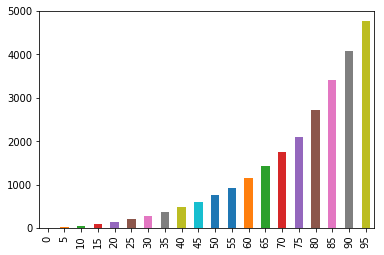

In [68]:
all_actors = pd.Series(actors)
acc_frequency = all_actors.value_counts().cumsum() / len(all_actors) * 100
x = [i for i in range(0,100, 5)]
y = [len(acc_frequency[acc_frequency < i]) for i in x]
frequencies = pd.Series(index=x, data=y)
frequencies.plot(kind='bar')

In [69]:
##Eliminando os atores menos frequentes - serão utilizados os que tem frequencia acumulada somada, em ordem, ate 80
selected_actors = list(acc_frequency[acc_frequency < 70].index)
len(selected_actors)

1758

In [70]:
actor_vectorizer = CountVectorizer()
actor_vectorizer.fit(selected_actors)
vocabulary = sorted(actor_vectorizer.vocabulary_)
len(vocabulary)

1758

In [71]:
#actors_vect =  actor_vectorizer.transform(categorical_df['actors']).toarray()
#categorical_df['actors'] = actors_vect
binarized_actors = actor_vectorizer.transform(join_actors.values)
actors_df = pd.DataFrame(binarized_actors.toarray())
actors_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1748,1749,1750,1751,1752,1753,1754,1755,1756,1757
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
actors_df.rename(lambda x: 'actor_'+vocabulary[int(x)], axis='columns', inplace=True)
movies_df = movies_df.join(actors_df)
movies_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,movie_title,...,actor_zackward,actor_zakesmokae,actor_zeldarubinstein,actor_zinedinesoualem,actor_zoekazan,actor_zoeydeutch,actor_zooeydeschanel,actor_zoëbell,actor_zoëkravitz,actor_óscarjaenada
0,Color,James Cameron,0.889163,0.529412,0.508175,0.037090,0.001559,1.000000,Action|Adventure|Fantasy|Sci-Fi,Avatar,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Color,Gore Verbinski,0.370690,0.501548,0.024393,0.043395,0.062497,0.406840,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Color,Sam Mendes,0.740148,0.436533,0.391504,0.006914,0.017184,0.263080,Action|Adventure|Thriller,Spectre,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Color,Christopher Nolan,1.000000,0.486068,0.956518,1.000000,0.042185,0.589253,Action|Thriller,The Dark Knight Rises,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Color,Andrew Stanton,0.567734,0.386997,0.020567,0.022959,0.000997,0.096066,Action|Adventure|Sci-Fi,John Carter,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### País, diretor, idioma, Título, Cor, Classificação Indicativa, Título e Link

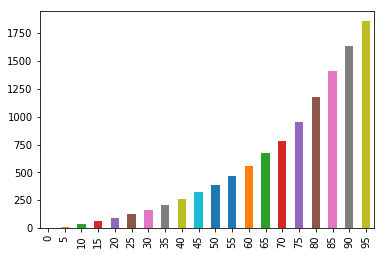

In [73]:
all_directors = movies_df.director_name
acc_frequency = all_directors.value_counts().cumsum() / len(all_directors) * 100
x = [i for i in range(0,100, 5)]
y = [len(acc_frequency[acc_frequency < i]) for i in x]
frequencies = pd.Series(index=x, data=y)
frequencies.plot(kind='bar')

In [74]:
##Eliminando os atores menos frequentes - serão utilizados os que tem frequencia acumulada somada, em ordem, ate 80
selected_directors = list(acc_frequency[acc_frequency < 70].index)
len(selected_directors), len(set(movies_df.director_name))

(785, 2089)

In [75]:
# substituindo os diretores irrelevantes por um diretor padrão
movies_df.director_name = movies_df.director_name.apply(lambda x: x if x in selected_directors else 'other')

In [76]:
movies_df.drop(columns=['movie_title', 'movie_imdb_link'], inplace=True) # não importam
variables = ['country', 'language', 'color', 'content_rating', 'director_name']
movies_df = pd.get_dummies(movies_df, columns=variables)
#movies_df.drop(columns=variables, inplace=True)
movies_df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,plot_keywords,...,director_name_William Friedkin,director_name_William Kaufman,director_name_William Malone,director_name_Wolfgang Petersen,director_name_Woody Allen,director_name_Xavier Gens,director_name_Yimou Zhang,director_name_Zack Snyder,director_name_Zal Batmanglij,director_name_other
0,0.889163,0.529412,0.508175,0.037090,0.001559,1.000000,Action|Adventure|Fantasy|Sci-Fi,0.524453,0.007358,avatar|future|marine|native|paraplegic,...,0,0,0,0,0,0,0,0,0,0
1,0.370690,0.501548,0.024393,0.043395,0.062497,0.406840,Action|Adventure|Fantasy,0.278865,0.073620,goddess|marriage ceremony|marriage proposal|pi...,...,0,0,0,0,0,0,0,0,0,0
2,0.740148,0.436533,0.391504,0.006914,0.017184,0.263080,Action|Adventure|Thriller,0.163256,0.017813,bomb|espionage|sequel|spy|terrorist,...,0,0,0,0,0,0,0,0,0,0
3,1.000000,0.486068,0.956518,1.000000,0.042185,0.589253,Action|Thriller,0.677216,0.162559,deception|imprisonment|lawlessness|police offi...,...,0,0,0,0,0,0,0,0,0,0
5,0.567734,0.386997,0.020567,0.022959,0.000997,0.096066,Action|Adventure|Sci-Fi,0.125579,0.002849,alien|american civil war|male nipple|mars|prin...,...,0,0,0,0,0,0,0,0,0,0


### 3.3 Codificando colunas em formato de lista (gênero e keywords)

#### Gêneros

In [77]:
#Processando gênero
# Transformando string em lista
genres =  movies_df.genres.apply(remove_special_chars)
genres.head()
len(genres)

4544

In [78]:
vocabulary = set()
genres.apply(lambda x: vocabulary.update(x.split('|')))

genre_vectorizer = CountVectorizer()
genre_vectorizer.fit(vocabulary)
vocabulary = sorted(genre_vectorizer.vocabulary_)
vocabulary

['action',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'filmnoir',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'romance',
 'scifi',
 'short',
 'sport',
 'thriller',
 'war',
 'western']

In [79]:
vect_genres = genre_vectorizer.transform(genres.values)
genres_binary_df = pd.DataFrame(vect_genres.toarray())
genres_binary_df.rename(lambda x: 'genre_'+vocabulary[int(x)], axis='columns', inplace=True)
genres_binary_df.head()

,genre_action,genre_adventure,genre_animation,genre_biography,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_family,genre_fantasy,...,genre_musical,genre_mystery,genre_news,genre_romance,genre_scifi,genre_short,genre_sport,genre_thriller,genre_war,genre_western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [80]:
# Colocando de volta no Dataframe
movies_df.drop('genres', axis='columns', inplace=True)
movies_df = movies_df.join(genres_binary_df)
#categorical_df.head()

#### Keywords

In [81]:
#Lembrete do problema de '1000000 b.c.

In [82]:
# Processando keywords
keywords = movies_df.plot_keywords.astype(str).apply(remove_special_chars)
all_keywords = []
keywords.apply(lambda x: all_keywords.extend(x.split('|')))
keywords.head()

0               avatar|future|marine|native|paraplegic
1    goddess|marriageceremony|marriageproposal|pira...
2                  bomb|espionage|sequel|spy|terrorist
3    deception|imprisonment|lawlessness|policeoffic...
5      alien|americancivilwar|malenipple|mars|princess
Name: plot_keywords, dtype: object

In [83]:
len(set(all_keywords))

7693

In [84]:
all_keywords = pd.Series(all_keywords)
acc_frequency = all_keywords.value_counts().cumsum() / len(all_keywords) * 100
x = [i for i in range(0,100, 5)]
y = [len(acc_frequency[acc_frequency < i]) for i in x]
frequencies = pd.Series(index=x, data=y)

In [85]:
##Eliminando os atores menos frequentes - serão utilizados os que tem frequencia acumulada somada, em ordem, ate 80
selected_keywords = list(acc_frequency[acc_frequency < 70].index)
len(selected_keywords), len(set(all_keywords))

(1961, 7693)

In [86]:
keyword_vectorizer = CountVectorizer()
keyword_vectorizer.fit(selected_keywords)
vocabulary = sorted(keyword_vectorizer.vocabulary_)
len(vocabulary)

1961

In [87]:
vect_keywords = keyword_vectorizer.transform(keywords)
keywords_binary_df = pd.DataFrame(vect_keywords.todense())
keywords_binary_df.rename(lambda x: 'keyword_'+vocabulary[int(x)], axis='columns', inplace=True)
len(keywords_binary_df.loc[0])

1961

In [88]:
# Colocando de volta no Dataframe
movies_df.drop('plot_keywords', axis='columns', inplace=True)
movies_df = movies_df.join(keywords_binary_df)
#movies_df.head()
len(movies_df.loc[0])

4656

## PCA

In [89]:
y_columns = ['imdb_score','gross', 'movie_facebook_likes', 'num_critic_for_reviews', 'num_user_for_reviews', 'num_voted_users']
movies_df.dropna(inplace=True)
Y_df = movies_df[y_columns]
X_df = movies_df.drop(y_columns, axis='columns')

In [90]:
from sklearn.decomposition import PCA
pca = PCA()
X = pca.fit_transform(X_df)

In [91]:
print(len(X[0]))
result = Y_df.join(pd.DataFrame(X))
result.head()

4215


,imdb_score,gross,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,0,1,2,3,...,4205,4206,4207,4208,4209,4210,4211,4212,4213,4214
0,0.818182,1.000000,0.094530,0.889163,0.603479,0.524453,-6.896386,1.535819,0.008473,0.314553,...,0.000162,0.000010,0.000624,-0.000084,0.000055,0.000025,-0.000033,-0.000003,-4.054731e-06,1.322613e-15
1,0.714286,0.406840,0.194246,0.370690,0.244515,0.278865,-4.900712,1.391440,0.099803,0.141310,...,0.000926,-0.000545,0.000487,0.000070,-0.000193,0.000157,0.000054,-0.000053,-1.132623e-05,1.322613e-15
2,0.675325,0.263080,0.243531,0.740148,0.196284,0.163256,-12.898971,1.126468,-0.655228,0.202825,...,-0.000077,0.000735,0.000047,0.000282,-0.000071,0.000173,-0.000023,0.000023,5.421196e-06,1.322613e-15
3,0.896104,0.589253,0.469899,1.000000,0.533702,0.677216,-9.894872,1.063038,-0.662349,-0.066438,...,0.000107,-0.000164,0.000082,0.000150,-0.000014,0.000046,0.000029,0.000009,-6.457528e-06,1.322613e-15
5,0.649351,0.096066,0.068741,0.567734,0.145681,0.125579,-4.899475,1.075782,1.513034,-0.036128,...,-0.000313,-0.000148,0.000009,-0.000056,0.000027,-0.000059,-0.000034,0.000012,8.674667e-07,1.322613e-15


## 5.0 Agrupando resultados e exportando

In [92]:
result.to_csv('../models/data_com_pca.csv')
movies_df.to_csv('../models/data_sem_pca.csv')